# Reweighted loss functions for the neural flow diffusion model

## Variational diffusion models

### Definition of the forward process

Let's define the forward process

\begin{align}
    z = \alpha x + \sigma \varepsilon,
    \quad \text{where} \quad
    \alpha^2 + \sigma^2 = 1
\end{align}

Then we have the following connections:

\begin{align}
    x = \frac{z - \sigma \varepsilon}{\alpha}
    \quad \text{and} \quad
    \varepsilon = \frac{z - \alpha x}{\sigma}
\end{align}

### Signal-To-Noise Ratio (SNR)

Introduce the Signal-To-Noise Ratio (SNR)

\begin{align}
    SNR = \frac{\alpha^2}{\sigma^2}
\end{align}

Reparametrization through the gamma function

\begin{align}
    SNR = e^{-\gamma}
\end{align}

Then we can rewrite the $\alpha$ and $\sigma$ coefficients in terms of the gamma function

\begin{align}
    SNR = \frac{\alpha^2}{1 - \alpha^2} = e^{-\gamma}
    \quad \Rightarrow \quad
    \alpha^2 &= \frac{e^{-\gamma}}{1 + e^{-\gamma}} = \frac{1}{1 + e^{\gamma}} = \sigma(-\gamma) \\
    \sigma^2 &= 1 - \alpha^2 = \frac{1}{1 + e^{-\gamma}} = \sigma(\gamma)
\end{align}

### Conditional ODE and SDEs

The conditional ODE is

\begin{align}
    f = \dot{\alpha} x + \dot{\sigma} \varepsilon = \dot{\alpha} x + \frac{\dot{\sigma}}{\sigma} (z - \alpha x)
\end{align}

The conditional score function is

\begin{align}
    s = - \frac{\varepsilon}{\sigma} = \frac{\alpha x - z}{\sigma^2}
\end{align}

Combining the drift of the ODE $f$ and the score function $s$ with the volatility $g$ we can write down the conditional forward SDE

\begin{align}
    d z = f^F d t + g d w, \quad \text{where} \quad f^F = f + \frac{g^2}{2} s
\end{align}

Similarly, we can write down the conditional backward SDE

\begin{align}
    d z = f^B d t + g d \bar{w}, \quad \text{where} \quad f^B = f - \frac{g^2}{2} s
\end{align}

### Derivation of the volatility

In general, the volatility $g$ can be an arbitrary function of time $t$. However, there is one useful consideration that can help us parameterise in a more efficient way.


In diffusion models, we aim to match the distribution of trajectories of the forward and reversed processes. The reverse process is Markovian by design. Therefore, to be able to match the distributions of trajectories, the forward process should also be Markovian. TO guaranry this, we can find such a volatility $g$ that makes the forward process independent on $x$.

I don't know how to derive $g$ analytically in general case, but we can do it in case of the VDM.

\begin{align}
    f^F
    &= f + \frac{g^2}{2} s \\
    &= \dot{\alpha} x + \frac{\dot{\sigma}}{\sigma} (z - \alpha x) + \frac{g^2}{2} \frac{\alpha x - z}{\sigma^2} \\
    &= \underbrace{ \left( \dot{\alpha} - \frac{\dot{\sigma}}{\sigma} \alpha + \frac{g^2}{2} \frac{\alpha}{\sigma^2} \right) }_{=0} x + \left( \frac{\dot{\sigma}}{\sigma} - \frac{g^2}{2} \frac{1}{\sigma^2} \right) z \\
\end{align}

That gives us the expression for the volatility

\begin{align}
    g^2
    &= 2 \frac{\sigma^2}{\alpha} \left( \frac{\dot{\sigma}}{\sigma} \alpha - \dot{\alpha} \right) \\
    &= 2 \sigma \dot{\sigma} - 2 \sigma^2 \frac{\dot{\alpha}}{\alpha} \\
    &= (\sigma^2)' - 2 (\log \alpha)' \sigma^2
\end{align}

We can also rewrite the volatility in terms of the gamma function

\begin{align}
    g^2
    &= (\sigma^2)' - 2 (\log \alpha)' \sigma^2 \\
    &= (\sigma^2)' - \frac{2 \alpha \dot{\alpha}}{\alpha^2} \sigma^2 \\
    &= (\sigma(\gamma))' - \frac{(\sigma(-\gamma))'}{\sigma(-\gamma)} \sigma(\gamma) \\
    &= \sigma(\gamma) \left( 1 - \sigma(\gamma) \right) \dot{\gamma} + \frac{\sigma(-\gamma) \left( 1 - \sigma(-\gamma) \right) \dot{\gamma}}{\sigma(-\gamma)} \sigma(\gamma) \\
    &= \sigma(\gamma) \dot{\gamma} \left( 1 - \sigma(\gamma) + \underbrace{1 - \sigma(-\gamma)}_{=\sigma(\gamma)} \right) \\
    &= \sigma(\gamma) \dot{\gamma}
\end{align}

To keep the volatility function general, but preserve the connection with the gamma function, we derived, we can reperametrize the volatility function as follows

\begin{align}
    g^2 = \sigma(\gamma) \dot{\gamma} \eta
\end{align}

where $\eta$ is an arbitrary non-negative function of time $t$. If we set $\eta = 1$, we will recover the Markovian volatility.

### Reverse process

We define the reverse process through prediction $\hat{x}(z,t)$ that we substitute into the conditional backward SDE:

\begin{align}
    d z = \hat{f}^B d t + g d \bar{w}, \quad \text{where} \quad \hat{f}^B(z, t) = f^B(z, t, \hat{x}(z,t))
\end{align}


### Derivation of the ELBO

We know that the ELBO of diffusion models is

\begin{align}
    \mathcal{L} = \lambda_{f^B} \left\| f^B - \hat{f}^B \right\|_2^2, \quad \text{where} \quad \lambda_{f^B} = \frac{1}{2 g^2}
\end{align}

For VDM, we can rewrite the $f^B$ as:
\begin{align}
    f^B
    &= f - \frac{g^2}{2} s \\
    &= \dot{\alpha} x + \frac{\dot{\sigma}}{\sigma} (z - \alpha x) - \frac{g^2}{2} \frac{\alpha x - z}{\sigma^2} \\
    &= \left( \dot{\alpha} - \frac{\dot{\sigma}}{\sigma} \alpha - \frac{g^2}{2} \frac{\alpha}{\sigma^2} \right) x + \left( \frac{\dot{\sigma}}{\sigma} + \frac{g^2}{2} \frac{1}{\sigma^2} \right) z
\end{align}

Since the second term doesn't depend on $x$ and will cancel out in the ELBO, we can rewrite the ELBO as:

\begin{align}
    \mathcal{L} = \lambda_x \left\| x - \hat{x} \right\|_2^2
\end{align}

Let's derive the $\lambda_x$ coefficient

\begin{align}
    \lambda_x
    &= \frac{1}{2 g^2} \left( \dot{\alpha} - \frac{\dot{\sigma}}{\sigma} \alpha - \frac{g^2}{2} \frac{\alpha}{\sigma^2} \right)^2 \\
    &= \frac{1}{2 g^2} \left( \frac{\alpha}{2} \frac{2 \alpha \dot{\alpha}}{\alpha^2} - \frac{\alpha}{2} \frac{2 \sigma \dot{\sigma}}{\sigma^2} - \frac{\alpha}{2} \frac{g^2}{\sigma^2} \right)^2 \\
    &= \frac{1}{2 g^2} \frac{\alpha^2}{2^2} \left( \frac{(\alpha^2)'}{\alpha^2} - \frac{(\sigma^2)'}{\sigma^2} - \frac{g^2}{\sigma^2} \right)^2 \\
    &= \frac{1}{2} \frac{\alpha^2}{\sigma^2} \frac{1}{2^2 \dot{\gamma} \eta} \left( \frac{(\alpha^2)'}{\alpha^2} - \frac{(\sigma^2)'}{\sigma^2} - \frac{\sigma^2 \dot{\gamma} \eta}{\sigma^2} \right)^2 \\
    &= \frac{1}{2} e^{-\gamma} \frac{1}{2^2 \dot{\gamma} \eta} \left( \frac{\sigma(-\gamma) \left( 1 - \sigma(-\gamma) \right) (-1) \dot{\gamma}}{\sigma(-\gamma)} - \frac{\sigma(\gamma) \left( 1 - \sigma(\gamma) \right) \dot{\gamma}}{\sigma(\gamma)} - \dot{\gamma} \eta \right)^2 \\
    &= \frac{1}{2} e^{-\gamma} \frac{1}{2^2 \dot{\gamma} \eta} \left( \big[ - \underbrace{\left( 1 - \sigma(-\gamma) \right)}_{=\sigma(\gamma)} -  1 + \sigma(\gamma) \big] \dot{\gamma} - \dot{\gamma} \eta \right)^2 \\
    &= \frac{1}{2} e^{-\gamma} \frac{1}{2^2 \dot{\gamma} \eta} \left( - \dot{\gamma} - \dot{\gamma} \eta \right)^2 \\
    &= \frac{1}{2} e^{-\gamma} \frac{ \dot{\gamma}^2 \left( 1 + \eta \right)^2 }{2^2 \dot{\gamma} \eta} \\
    &= \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta}
\end{align}

Since nothing except the last coefficient depends on function $\eta$, we can see, we can easily find the optimal $\eta$. It is $\eta = 1$. Therefore, the optimal volatility function is a Markovian volatility.

We can also find a nice connection with the SNR function, when $\eta = 1$

\begin{align}
    SNR' = (e^{-\gamma})' = -e^{-\gamma} \dot{\gamma}, \quad \lambda_x = \frac{1}{2} e^{-\gamma} \dot{\gamma} = - \frac{1}{2} SNR'
\end{align}

### Alternative formulations of the ELBO

Similarly, to formulation of the ELBO in terms of the prediction $\hat{f}^B$ or $\hat{x}$, we can rewrite the ELBO in terms of prediction of $\hat{\varepsilon}$

\begin{align}
    x = \frac{z - \sigma \varepsilon}{\alpha}
\end{align}

\begin{align}
    \mathcal{L} = \lambda_\varepsilon \left\| \varepsilon - \hat{\varepsilon} \right\|_2^2
\end{align}

\begin{align}
    \lambda_\varepsilon
    &= \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta} \frac{\sigma^2}{\alpha^2} \\
    &= \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta} e^{\gamma} \\
    &= \frac{1}{2} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta}
\end{align}

When $\eta = 1$, we have

\begin{align}
    \log-SNR' = -\dot{\gamma}, \quad \lambda_\varepsilon = \frac{1}{2} \dot{\gamma} = - \frac{1}{2} \log-SNR'
\end{align}

We can also rewrite the ELBO in terms of the prediction of $\hat{v}$ function (see Appendix D in [this paper](https://arxiv.org/abs/2202.00512))

\begin{align}
    x = \alpha z - \sigma v
\end{align}

\begin{align}
    \mathcal{L} = \lambda_v \left\| v - \hat{v} \right\|_2^2
\end{align}

\begin{align}
    \lambda_v
    &= \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta} \sigma^2 \\
    &= \frac{1}{2} \frac{e^{-\gamma}}{1 + e^{-\gamma}} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta} \\
    &= \frac{1}{2} \sigma(-\gamma) \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta} \\
    &= \frac{1}{2} \alpha^2 \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta}
\end{align}

### Reweighted ELBO formulations

As we know from a lot of papers, diffusion models often have better performance when trained not with the ELBO objective, but with reweighted ELBO functions like:

\begin{align}
    \mathcal{L}_x = \left\| x - \hat{x} \right\|_2^2 = \frac{1}{\lambda_x} \mathcal{L} \quad \text{or} \quad \mathcal{L}_\varepsilon = \left\| \varepsilon - \hat{\varepsilon} \right\|_2^2 = \frac{1}{\lambda_\varepsilon} \mathcal{L}
\end{align}

But what should we do if the model predicts $\hat{x}$ and we want to train a model with $\mathcal{L}_\varepsilon$? We can simply take the $\mathcal{L}_x$ or $\mathcal{L}$ and reweight it!
\begin{align}
    \mathcal{L}_\varepsilon = \frac{\lambda_x}{\lambda_\varepsilon} \mathcal{L}_x = \frac{1}{\lambda_\varepsilon} \mathcal{L}
\end{align}

Importantly, the choice of the reweighting coefficient doesn't depend on the parameterization of the model. We can parameterize the model throgh prediction $\hat{x}$, $\hat{\varepsilon}$, or $\hat{v}$ with same objective function.

## Rewaighted ELBO for NFDM

### General case

In the general case, when the forward process defined as

\begin{align}
    z = F(\varepsilon, t, x),
\end{align}

there is not much we can do. We can rewaight the ELBO with the $\frac{1}{2 g^2}$ coefficient, which is a part of the ELBO, but I'm not sure if it will help. We can also try to rewaight the ELBO with the different $\lambda$ coefficients from VDM. However, since $F$ doesn't have any connections with the SNR, I don't now what such a reweighting can give us.

### Less general case

We can consider the case with a less general forward process

\begin{align}
    z = \alpha F(x, t) + \sigma G(x, t) \varepsilon
\end{align}

This is a Gaussian forward process and it does have a connection with the SNR function. Therefore, we can reweight the ELBO with the $\lambda$ coefficients from VDM. If $F=x$ and $G=1$, we will recover exactly the VDM case.

### NDM

We can simplify the forward process a bit more and consider the NDM case

\begin{align}
    z = \alpha F(x, t) + \sigma \varepsilon
\end{align}

For this case, the same logic applies. We can take the true ELBO and reweight it with the $\lambda$ coefficients from VDM. However, in this case we can even slightly simplify the calculations. Let's write down the ELBO for the NDM:

\begin{align}
    f^B
    &= f - \frac{g^2}{2} s \\
    &= \dot{\alpha} F + \alpha \dot{F} + \frac{\dot{\sigma}}{\sigma} (z - \alpha F) - \frac{g^2}{2} \frac{\alpha F - z}{\sigma^2} \\
    &= \left( \dot{\alpha} - \frac{\dot{\sigma}}{\sigma} \alpha - \frac{g^2}{2} \frac{\alpha}{\sigma^2} \right) F + \alpha \dot{F} + \left( \frac{\dot{\sigma}}{\sigma} + \frac{g^2}{2} \frac{1}{\sigma^2} \right) z
\end{align}

\begin{align}
    \mathcal{L} 
    &= \frac{1}{2 g^2} \left\| f^B - \hat{f}^B \right\|_2^2 \\
    &= \frac{1}{2 g^2} \left\| \left( \dot{\alpha} - \frac{\dot{\sigma}}{\sigma} \alpha - \frac{g^2}{2} \frac{\alpha}{\sigma^2} \right) \left( F - \hat{F} \right) + \alpha \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{1}{2} \left\| \frac{1}{g} \left( \dot{\alpha} - \frac{\dot{\sigma}}{\sigma} \alpha - \frac{g^2}{2} \frac{\alpha}{\sigma^2} \right) \left( F - \hat{F} \right) + \frac{\alpha}{g} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{1}{2} \left\| \sqrt{2 \lambda_x} \left( F - \hat{F} \right) + \frac{\alpha}{g} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{1}{2} \left\| \sqrt{2 \lambda_x} \left( F - \hat{F} \right) + \frac{\alpha}{\sigma} \frac{\sqrt{\dot{\gamma}}}{\dot{\gamma}} \frac{\sqrt{\eta}}{\eta} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{1}{2} \left\| e^{-\frac{\gamma}{2}} \sqrt{\dot{\gamma}} \frac{ 1 + \eta }{2} \frac{\sqrt{\eta}}{\eta} \left( F - \hat{F} \right) + e^{-\frac{\gamma}{2}} \frac{\sqrt{\dot{\gamma}}}{\dot{\gamma}} \frac{\sqrt{\eta}}{\eta} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{1}{\eta} \left\| \frac{ 1 + \eta }{2} \left( F - \hat{F} \right) + \frac{1}{\dot{\gamma}} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \lambda_F \left\| \frac{ 1 + \eta }{2} \left( F - \hat{F} \right) + \frac{1}{\dot{\gamma}} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2, \quad \text{where} \quad \lambda_F = \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{1}{\eta}
\end{align}

Importantly, $\eta = 1$ doesn't necessarily minimises the ELBO in this case.

Therefore, if we want to train the NDM with $\mathcal{L}_x$ objective, we can do it as follows

\begin{align}
    \mathcal{L}_x
    &= \frac{1}{\lambda_x} \mathcal{L} \\
    &= \frac{\lambda_F}{\lambda_x} \left\| \frac{ 1 + \eta }{2} \left( F - \hat{F} \right) + \frac{1}{\dot{\gamma}} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{ \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{1}{\eta} }{ \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta} } \left\| \frac{ 1 + \eta }{2} \left( F - \hat{F} \right) + \frac{1}{\dot{\gamma}} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{ 2^2 }{ \left( 1 + \eta \right)^2 } \left\| \frac{ 1 + \eta }{2} \left( F - \hat{F} \right) + \frac{1}{\dot{\gamma}} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2
\end{align}

## Implementation

### Imports and utils

In [59]:
from abc import ABC, abstractmethod
from typing import Callable, Optional

import numpy as np

import torch
from torch import nn, Tensor
from torch.nn import functional as F
import torch.distributions as D

import matplotlib.pyplot as plt
from tqdm import tqdm, trange

In [60]:
class Net(nn.Module):
    def __init__(self, in_dim: int, out_dim: int):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(in_dim, 64),
            nn.SELU(),
            nn.Linear(64, 64),
            nn.SELU(),
            nn.Linear(64, 64),
            nn.SELU(),
            nn.Linear(64, 64),
            nn.SELU(),
            nn.Linear(64, out_dim),
        )

    def forward(self, t: Tensor) -> Tensor:
        return self.net(t)

In [61]:
@torch.no_grad()
def solve_sde(
        sde: Callable[[Tensor, Tensor], tuple[Tensor, Tensor]],
        z: Tensor,
        ts: float,
        tf: float,
        n_steps: int,
        show_pbar: bool=False
):
    bs = z.shape[0]

    t_steps = torch.linspace(ts, tf, n_steps + 1)
    dt = (tf - ts) / n_steps
    dt_2 = abs(dt) ** 0.5

    path = [z]
    pbar = tqdm if show_pbar else (lambda a: a)
    for t in pbar(t_steps[:-1]):
        t = t.expand(bs, 1)

        f, g = sde(z, t)

        w = torch.randn_like(z)
        z = z + f * dt + g * w * dt_2

        path.append(z)

    return z, (t_steps, torch.stack(path))

In [62]:
class TimeSampler(nn.Module, ABC):
    def __init__(self, salt_fraction: Optional[int] = None):
        super().__init__()

        self._salt_fraction = salt_fraction

    @abstractmethod
    def prob(self, t: Tensor) -> Tensor:
        raise NotImplementedError

    @abstractmethod
    def sample(self, bs: int) -> Tensor:
        raise NotImplementedError

    def loss(self, loss: Tensor, t: Tensor) -> Tensor:
        """
        In terms of minimization of the variance, this loss is not quite correct. Firstly, in lit module,
        we detach t and loss. Theoretically we should differentiate end-to-end through loss to obtain
        the true gradient w.r.t. parameters of the proposal distribution. However, to do this, we must
        differentiate through the training step second time just to optimize the proposal distribution,
        which is too expensive. Therefore, we detach t and loss and work with biased gradient. Secondly,
        we should take into account the salting, which we don't.
        """

        p = self.prob(t)

        l2 = loss ** 2
        p2 = p ** 2

        return l2 / p2

    def forward(self, bs: int) -> tuple[Tensor, Tensor]:
        t = self.sample(bs)

        dtype = t.dtype
        device = t.device

        if self._salt_fraction is not None:
            assert bs % self._salt_fraction == 0

            bs2 = bs // self._salt_fraction
            bs1 = bs - bs2

            un = D.Uniform(
                torch.tensor([0.], dtype=dtype, device=device),
                torch.tensor([1.], dtype=dtype, device=device)
            )
            u = un.sample(torch.Size((bs2,)))

            t = torch.cat([t[:bs1], u], dim=0)

            p = self.prob(t)

            k = 1 / self._salt_fraction
            p = p * (1 - k) + k
        else:
            p = self.prob(t)

        return t, p


class UniformSampler(TimeSampler):
    def __init__(self, salt_fraction: Optional[int] = None):
        super().__init__(salt_fraction)

        self.register_buffer("_l", torch.tensor(0.))
        self.register_buffer("_r", torch.tensor(1.))

    @property
    def _u(self) -> D.Uniform:
        return D.Uniform(self._l, self._r)

    def prob(self, t: Tensor) -> Tensor:
        return self._u.log_prob(t).squeeze(dim=1).exp()

    def sample(self, bs: int) -> Tensor:
        return self._u.sample(torch.Size((bs, 1)))


class BucketSampler(TimeSampler):
    def __init__(self, n: int = 100, salt_fraction: Optional[int] = None):
        super().__init__(salt_fraction)

        self._logits = nn.Parameter(torch.ones(n))

    @property
    @abstractmethod
    def _bucket_prob(self) -> Tensor:
        raise NotImplementedError

    @property
    @abstractmethod
    def _bucket_width(self) -> Tensor:
        raise NotImplementedError

    @property
    def _bucket_height(self) -> Tensor:
        return self._bucket_prob / self._bucket_width

    @property
    def _bucket_bounds(self) -> tuple[Tensor, Tensor]:
        w = self._bucket_width

        dtype = w.dtype
        device = w.device

        b_r = torch.cumsum(w, dim=0)
        b_l = torch.cat([torch.zeros(1, dtype=dtype, device=device), b_r[:-1]])

        return b_l, b_r

    def prob(self, t: Tensor) -> Tensor:
        t = t.flatten()

        t, ids_t = torch.sort(t)
        inv_ids_t = torch.argsort(ids_t)

        b_l, _ = self._bucket_bounds

        ids_p = torch.searchsorted(b_l, t, right=True) - 1

        p = self._bucket_height
        p = torch.index_select(p, 0, ids_p)
        p = torch.index_select(p, 0, inv_ids_t)

        return p

    def sample(self, bs: int) -> Tensor:
        b_p = self._bucket_prob
        b_l, b_r = self._bucket_bounds

        dtype = b_p.dtype
        device = b_p.device

        cat = D.Categorical(b_p)
        ids = cat.sample(torch.Size((bs,)))

        un = D.Uniform(
            torch.tensor(0., dtype=dtype, device=device),
            torch.tensor(1., dtype=dtype, device=device)
        )
        u = un.sample(torch.Size((bs,)))

        t = torch.index_select(b_l, 0, ids) + torch.index_select(b_r - b_l, 0, ids) * u
        t = t[:, None]

        return t


class UniformBucketSampler(BucketSampler):
    @property
    def _bucket_prob(self) -> Tensor:
        logits = self._logits
        logits = torch.clamp(logits, min=-10, max=10)

        return torch.softmax(logits, dim=0)

    @property
    def _bucket_width(self) -> Tensor:
        logits = self._logits
        dtype = logits.dtype
        device = logits.device
        n = logits.shape[0]
        return torch.ones(n, dtype=dtype, device=device) / n

In [63]:
def viz_2d_data(data: Tensor):
    plt.scatter(data[:, 0], data[:, 1], s=1)
    plt.axis("scaled")
    plt.show()

In [64]:
def viz_2d_path(t_steps: Tensor, path: Tensor, n_lines: int=-1, color: str | None=None):
    plt.figure(figsize=(12, 12))
    plt.scatter(15 + path[0, :, 0], path[0, :, 1], s=1)
    plt.scatter(path[-1, :, 0], path[-1, :, 1], s=1)
    plt.plot(15 * t_steps[:, None] + path[:, :n_lines, 0],
             path[:, :n_lines, 1],
             color=color, alpha=0.5)
    plt.axis("scaled")
    plt.tick_params(left=False, labelleft=False,
                    bottom=False, labelbottom=False)
    plt.show()

In [65]:
def gen_data(n: int):
    scale = 4.
    centers = torch.tensor([
        [1, 0],
        [-1, 0],
        [0, 1],
        [0, -1],
        [1. / np.sqrt(2), 1. / np.sqrt(2)],
        [1. / np.sqrt(2), -1. / np.sqrt(2)],
        [-1. / np.sqrt(2), 1. / np.sqrt(2)],
        [-1. / np.sqrt(2), -1. / np.sqrt(2)]
    ], dtype=torch.float32)
    centers = scale * centers

    x = torch.randn(n, 2)
    x = 0.5 * x

    center_ids = torch.randint(0, 8, (n,))
    x = x + centers[center_ids]

    x = x / 2 ** 0.5

    return x

# generates data of dimension 2
data = gen_data(10)
print(data)

tensor([[-0.2549,  2.8834],
        [ 1.8026, -1.6246],
        [ 3.0885,  0.4230],
        [ 2.4511,  0.2561],
        [ 1.9724, -2.3536],
        [-0.9981,  2.6153],
        [ 2.8548, -0.3414],
        [ 2.6381, -2.2929],
        [ 1.0404,  1.8951],
        [-3.5125, -0.0827]])


### Forward process

In [66]:
def jvp(f, x, v):
    return torch.autograd.functional.jvp(
        f, x, v,
        create_graph=torch.is_grad_enabled()
    )

def t_dir(f, t):
    return jvp(f, t, torch.ones_like(t))

In [67]:
class AffineTransform(nn.Module, ABC):
    @abstractmethod
    def get_m_s(self, x: Tensor, t: Tensor) -> tuple[Tensor, Tensor]:
        raise NotImplementedError

    def forward(self, x: Tensor, t: Tensor) -> tuple[tuple[Tensor, Tensor], tuple[Tensor, Tensor]]:
        def f(t_in):
            return self.get_m_s(x, t_in)

        return t_dir(f, t)

In [68]:
class AffineTransformID(AffineTransform):
    @staticmethod
    def get_m_s(x, t):
        m = x
        s = torch.ones_like(x)
        return m, s

    @staticmethod
    def forward(x, t): # this is VDM. 
        m, s = AffineTransformID.get_m_s(x, t)

        dm = torch.zeros_like(x)
        ds = torch.zeros_like(x)

        return (m, s), (dm, ds)


class AffineTransformHalfNeural(AffineTransform):
    def __init__(self, d: int):
        super().__init__()

        self.net = Net(d, d)

    def get_m_s(self, x, t):
        #x_t = torch.cat([x, t], dim=1)
        m = self.net(x)

        #m = x + t * m
        s = torch.ones_like(x)

        return m, s

In [69]:
class Gamma(nn.Module, ABC):
    @staticmethod
    def alpha_2(g):
        return torch.sigmoid(-g)

    @staticmethod
    def sigma_2(g):
        return torch.sigmoid(g)

    @abstractmethod
    def get_gamma(self, t: Tensor) -> Tensor:
        raise NotImplementedError

    def forward(self, t: Tensor) -> tuple[Tensor, Tensor]:
        return t_dir(self.get_gamma, t)

In [70]:
class GammaLinear(Gamma):
    @staticmethod
    def get_gamma(t):
        return -10 + 20 * t

    @staticmethod
    def forward(t):
        g = GammaLinear.get_gamma(t)
        dg = torch.ones_like(t) * 20
        return g, dg

In [71]:
class GammaBad(Gamma):
    def __init__(self):
        super().__init__()

    def get_gamma(self, t):
        #return -13.3 + 18.3 * (1 / (1 + torch.exp(-5 * (t-0.5)))) #
        return -10 + 30 * (1 / (1 + torch.exp(-50 * (t - 0.999))))

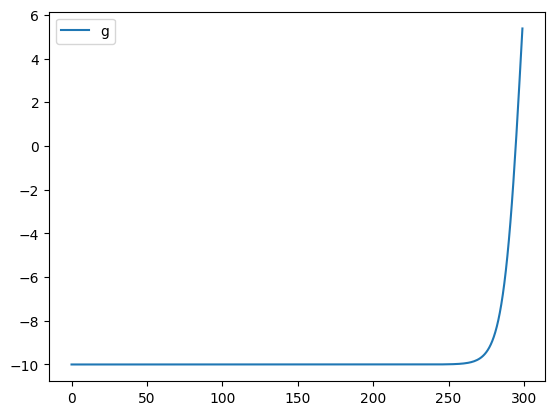

In [72]:
gamma_here = GammaBad()
with torch.no_grad():
    t = torch.linspace(0, 1, 300)[:, None]

    g, dgmm = gamma_here(t)
    #print(dgmm)
    
    #plt.plot(dgmm, label='dg')
    plt.plot(g, label='g')
    plt.legend()
    plt.show()

In [73]:
class PosLinear(nn.Linear):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.sp = nn.Softplus()

    def forward(self, x: Tensor) -> Tensor:
        weight = self.sp(self.weight)
        bias = self.bias
        return F.linear(x, weight, bias)


class GammaVDM(Gamma):
    def __init__(self):
        super().__init__()

        self.fc1 = PosLinear(1, 1)
        self.fc2 = PosLinear(1, 1024)
        self.fc3 = PosLinear(1024, 1)

    def get_unnorm_gamma(self, x):
        x = self.fc1(x)

        y = self.fc2(x)
        y = torch.sigmoid(y)
        y = self.fc3(y)

        return x + y

    def get_gamma(self, t):
        x_0 = torch.zeros(1, 1)
        x_1 = torch.ones(1, 1)
        y_0 = torch.ones(1, 1) * (-10)
        y_1 = torch.ones(1, 1) * 10 #flag
        y_gap = y_1 - y_0

        x_adj = torch.cat([x_0, x_1, t], dim=0)
        y_adj = self.get_unnorm_gamma(x_adj)
        yo_0, yo_1, yo = y_adj[:1], y_adj[1:2], y_adj[2:]

        y = y_0 + (y_1 - y_0) * (yo - yo_0) / (yo_1 - yo_0)

        return y

tensor(-4.6002) tensor(13.8023)


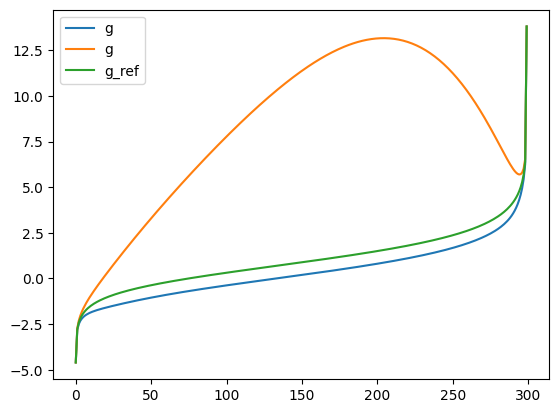

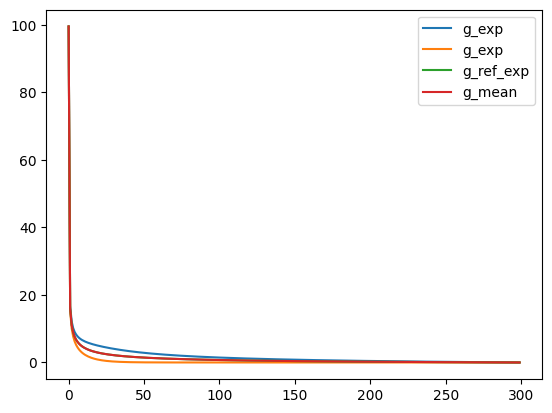

max rel‑error tensor(99.5038)
tensor(99.5038)


In [74]:
class GammaMuLAN(Gamma):
    #implement get_gamma and forward methods

    def __init__(self, config):
        super().__init__()
        self.config = config
        
        self.gamma_shape = config.gamma_shape
        self.n_features = config.seq_len * config.embedding_dim #what does this reflect? -> n flattend features 
        self.min_gamma = self.config.gamma_min
        self.max_minus_min_gamma = self.config.gamma_max - self.config.gamma_min
        self.grad_min_epsilon = 0.001
        self.around_reference = self.config.around_reference


        #self.l1 = nn.Linear(self.n_features, self.n_features)
        #if I want the noise injection to not depend on the input, more like vdm, since input dependence will be injected through ndm function transformation, I can just make the input of
        #l1 to be 1. which means the input is just the time t. That is not fully equal to MuLAN since there the a, b, d are dependent only on input not on t.
        #that also mean I will still need to implement the get_gamma method, but not the forward method, we need tdir still. 
        self.l1 = nn.Linear(1, self.n_features)
        self.l2 = nn.Linear(self.n_features, self.n_features)
        self.l3_a = nn.Linear(self.n_features, self.n_features)
        self.l3_b = nn.Linear(self.n_features, self.n_features)
        self.l3_c = nn.Linear(self.n_features, self.n_features)

    def _eval_polynomial(self, a, b, c, t):
        # Polynomial evaluation
        polynomial = (
            (a ** 2) * (t ** 5) / 5.0
            + (b ** 2 + 2 * a * c) * (t ** 3) / 3.0
            + a * b * (t ** 4) / 2.0
            + b * c * (t ** 2)
            + (c ** 2 + self.grad_min_epsilon) * t)
        
        scale = ((a ** 2) / 5.0
                 + (b ** 2 + 2 * a * c) / 3.0
                 + a * b / 2.0
                 + b * c
                 + (c ** 2 + self.grad_min_epsilon))

        return self.min_gamma + self.max_minus_min_gamma * polynomial / scale
    
    def _grad_t(self, a, b, c, t):
        # derivative = (at^2 + bt + c)^2
        polynomial = (
        (a ** 2) * (t ** 4)
        + (b ** 2 + 2 * a * c) * (t ** 2)
        + a * b * (t ** 3) * 2.0
        + b * c * t * 2
        + (c ** 2 + self.grad_min_epsilon))
        
        scale = ((a ** 2) / 5.0
                + (b ** 2 + 2 * a * c) / 3.0
                + a * b / 2.0
                + b * c
                + (c ** 2 + self.grad_min_epsilon))

        return self.max_minus_min_gamma * polynomial / scale

    def _compute_coefficients(self, t):
        _h = torch.nn.functional.silu(self.l1(t))
        _h = torch.nn.functional.silu(self.l2(_h))
        a = self.l3_a(_h)
        b = self.l3_b(_h)
        c = 1e-3 + torch.nn.functional.softplus(self.l3_c(_h))
        return a, b, c

    def get_reference_gamma(self, t):
        def safe_logit(x, eps=1e-6):
            """
            Stable log( x / (1 - x) ) for x in (0, 1).

            Parameters
            ----------
            x   : torch.Tensor   -- input, any shape
            eps : float          -- clamp width; keeps gradients finite
            """
            x = x.clamp(eps, 1.0 - eps)            # avoid exactly 0 or 1
            return torch.log(x) - torch.log1p(-x)   # log(x) - log(1 - x)
        s = (0.99-t) * 0.0001
        sqrt = torch.sqrt(t+s)
        gamma = safe_logit(sqrt)

        #gamma = torch.log(1/(1-sqrt) - 1)
        #gamma = -10 + 20 * t
        return gamma
    
    def get_gamma(self, t):
        x = torch.ones_like(t)
        a, b, c = self._compute_coefficients(x)
        gamma = self._eval_polynomial(a, b, c, t)
        #print(gamma.shape, "before")

        #print(self.around_reference)
        if self.around_reference:
            #print("hallooooooo")
            reference_gamma = self.get_reference_gamma(t)
            #gamma_i = gamma + gamma’_i - gamma’
            #where gamma is the reference gamma, and
            #gamma’ = log D - log sum exp(-gamma’_i)
            gamma_mean = torch.log(torch.tensor(self.n_features)) - torch.logsumexp(-gamma, dim=-1)
            #print(reference_gamma.shape, "ref")
            #print(gamma_mean.shape, "mean")
            gamma = reference_gamma + gamma - gamma_mean.unsqueeze(-1) #should broadcast
            #print(gamma.shape, "after")

        #shape should be bs=t.shape[0], gamma_shape
        #how do I append a value to the shape though?
        gamma = gamma.view(-1, *self.gamma_shape)

        return gamma
    
    def forward(self, t):
        if self.around_reference:
            gamma, dgamma = t_dir(self.get_gamma, t)
            dgamma = torch.clamp(dgamma, min=self.grad_min_epsilon)
            return gamma, dgamma

        x = torch.ones_like(t)
        a, b, c = self._compute_coefficients(x)
        dg = self._grad_t(a, b, c, t)
        return self.get_gamma(t), dg

    #def forward(self, t):
    #    gamma, dgamma = t_dir(self.get_gamma, t)
    #    #dgamma = torch.clamp(dgamma, min=self.grad_min_epsilon)
    #    return gamma, dgamma
    
    """
    @staticmethod
    def sigma_2(g):

        vector = torch.sigmoid(g)
        sigma_2 = torch.diagonal
    """
    

from types import SimpleNamespace

mulan_config = SimpleNamespace(
                gamma_shape=(2,),
                seq_len= 1,
                embedding_dim= 2,
                gamma_min= -4.6002,
                gamma_max= 14.5561,
                around_reference=True,
                )

#if gamma min and gamma max dont match the reference curve you will get weird stuff
#for the reference curve we can get gamma min and gamma max by 

gamma_here = GammaMuLAN(mulan_config)

gamma_min = gamma_here.get_reference_gamma(torch.tensor(0.))
gamma_max = gamma_here.get_reference_gamma(torch.tensor(1.))
print(gamma_min, gamma_max)
with torch.no_grad():
    t = torch.linspace(0, 1, 300)[:, None]

    g, dgmm = gamma_here(t)
    g_reference = gamma_here.get_reference_gamma(t)
    #print(dgmm)
    
    #plt.plot(dgmm, label='dg')
    plt.plot(g, label='g')
    plt.plot(g_reference, label='g_ref')
    plt.legend()
    plt.show()

with torch.no_grad():
    t = torch.linspace(0, 1, 300)[:, None]

    g, dgmm = gamma_here(t)
    g = torch.exp(-g)
    g_reference = gamma_here.get_reference_gamma(t)
    g_reference = torch.exp(-g_reference)
    #print(dgmm)
    g_mean = g.mean(dim=-1)
    
    #plt.plot(dgmm, label='dg')
    plt.plot(g, label='g_exp')
    plt.plot(g_reference, label='g_ref_exp')
    plt.plot(g_mean, label='g_mean')
    plt.legend()
    plt.show()

precision      = g            # e^{-γ_i}
precision_mean = precision.mean(dim=-1)   # average over D
precision_ref  = g_reference

print("max rel‑error",
      ((precision_mean - precision_ref).abs()).max())

print(((precision_mean - precision_ref).abs()).max())

In [75]:
class GammaTheirs(Gamma):
    def __init__(self):
        super().__init__()

    def get_reference_gamma(self, t):
        s = (0.99-t) * 0.0001
        sqrt = torch.sqrt(t+s)
        gamma = torch.log(1/(1-sqrt) - 1)
        return gamma


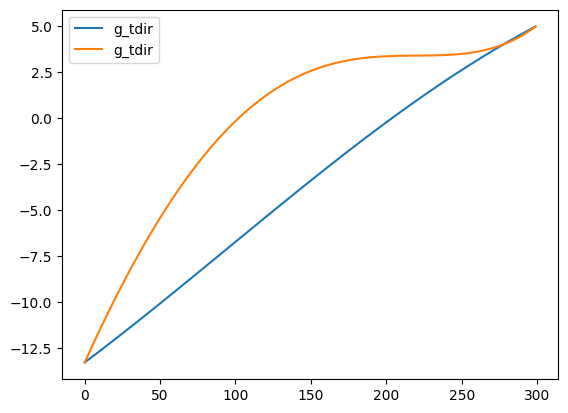

In [76]:
class GammaMuLANtDir(GammaMuLAN):
    #implement get_gamma and forward methods

    def __init__(self, config):
        super().__init__(config)
    
    def get_gamma(self, t):
        a, b, c = self._compute_coefficients(t)
        gamma_flat = self._eval_polynomial(a, b, c, t)
        #shape should be bs=t.shape[0], gamma_shape
        #how do I append a value to the shape though?
        
        gamma = gamma_flat.view(-1, *self.gamma_shape)
        #print(gamma.shape, "gamma shape")
        return gamma
        
    def forward(self, t):
        gamma, dgamma = t_dir(self.get_gamma, t)
        dgamma = torch.clamp(dgamma, min=self.grad_min_epsilon)
        return gamma, dgamma
    
    """
    @staticmethod
    def sigma_2(g):

        vector = torch.sigmoid(g)
        sigma_2 = torch.diagonal
    """
    

from types import SimpleNamespace

mulan_config = SimpleNamespace(
                gamma_shape=(2,),
                seq_len= 1,
                embedding_dim= 2,
                gamma_min= -13.3,
                gamma_max= 5.0,
                around_reference=True,
                )

gamma_here = GammaMuLANtDir(mulan_config)
with torch.no_grad():
    t = torch.linspace(0, 1, 300)[:, None]

    g, dgmm = gamma_here(t)
    #print(dgmm)
    
    #plt.plot(dgmm, label='dg')
    plt.plot(g, label='g_tdir')
    plt.legend()
    plt.show()
    plt.close()


Parameter containing:
tensor([[0.9844, 0.9690, 0.9536, 0.9382, 0.9229, 0.9075, 0.8921, 0.8767, 0.8614,
         0.8460, 0.8306, 0.8152, 0.7999, 0.7845, 0.7691, 0.7537, 0.7383, 0.7230,
         0.7076, 0.6922, 0.6768, 0.6615, 0.6461, 0.6307, 0.6153, 0.6000, 0.5846,
         0.5692, 0.5538, 0.5384, 0.5231, 0.5077, 0.4923, 0.4769, 0.4616, 0.4462,
         0.4308, 0.4154, 0.4000, 0.3847, 0.3693, 0.3539, 0.3385, 0.3232, 0.3078,
         0.2924, 0.2770, 0.2617, 0.2463, 0.2309, 0.2155, 0.2001, 0.1848, 0.1694,
         0.1540, 0.1386, 0.1233, 0.1079, 0.0925, 0.0771, 0.0618, 0.0464, 0.0310,
         0.0156]])
torch.Size([300, 64])


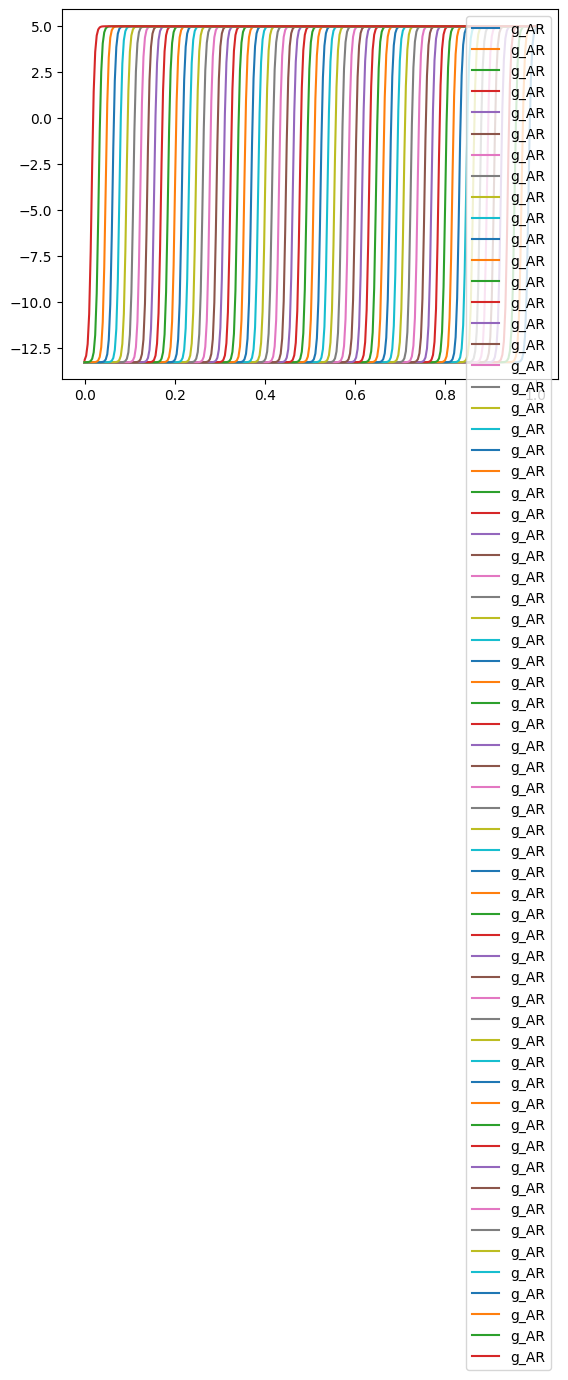

In [77]:
class GammaARReversed(Gamma):
    def __init__(self, config):
        super().__init__()
        self.config = config
        self.seq_len = config.seq_len
        self.min_gamma = config.gamma_min
        self.max_minus_min_gamma = config.gamma_max - config.gamma_min
        learn_tau = config.learn_tau
        learn_delta = config.learn_delta

        # Sharp sigmoid window: duration = 1 / seq_len
        self.tau = 1 / (config.seq_len * 5)  # or 6, 8, etc.

        # Reversed offsets: last token starts first
        delta_vals = torch.linspace(1/config.seq_len, 1 - 1 / config.seq_len, config.seq_len)
        self.delta = nn.Parameter(delta_vals.flip(0).view(1, config.seq_len), requires_grad=learn_delta)
        print(self.delta)

    def get_gamma(self, t):
        t = t.view(-1, 1)
        
        t_shifted = (t - self.delta) / self.tau  # [bs, seq_len]
        sigma = torch.sigmoid(t_shifted)
        gamma = self.min_gamma + self.max_minus_min_gamma * sigma
        return gamma

    def forward(self, t):
        t = t.view(-1, 1)  # [bs, 1]
        
        t_shifted = (t - self.delta) / self.tau  # [bs, seq_len]
        sigma = torch.sigmoid(t_shifted)

        gamma = self.min_gamma + self.max_minus_min_gamma * sigma
        dgamma_dt = (self.max_minus_min_gamma / self.tau) * sigma * (1 - sigma)

        return gamma, dgamma_dt  # [bs, seq_len]


mulan_config = SimpleNamespace(
                gamma_shape=(64,),
                seq_len= 64,
                embedding_dim= 1,
                gamma_min= -13.3,
                gamma_max= 5.0,
                tau=5,
                learn_delta=False,
                learn_tau=False
        )

gamma_here = GammaARReversed(mulan_config)

with torch.no_grad():
    t = torch.linspace(0, 1, 300)[:, None]

    g, dgmm = gamma_here(t) 
    print(g.shape) #-> problem, I need it to extend to 3 dims, I guess I should reshape the output 
    #print(dgmm)
    
    #plt.plot(dgmm, label='dg')
    plt.plot(t, g, label='g_AR')
    plt.legend()
    plt.show()
    plt.close()

In [78]:
class VolatilityEta(nn.Module, ABC):
    @abstractmethod
    def forward(self, t: Tensor) -> Tensor:
        raise NotImplementedError

In [79]:
class VolatilityEtaOne(nn.Module):
    def forward(self, t):
        return torch.ones_like(t)


class VolatilityEtaNeural(nn.Module, ABC):
    def __init__(self):
        super().__init__()

        self.net = Net(1, 1)
        self.sp = nn.Softplus()

    def forward(self, t):
        return self.sp(self.net(t))

class VolatilityEtaOneNew(nn.Module):
    def forward(self, t):
        return torch.ones(t.size(0), 2)
#vol = VolatilityEtaOneNew()
#print(vol(torch.tensor([1,2,4,5,6,7,54,2,3,4,5,6])))

### Reverse process

In [80]:
class Predictor(nn.Module):
    def __init__(self, d: int):
        super().__init__()

        self.net = Net(d + 1, d)

    def forward(self, z, t):
        z_t = torch.cat([z, t], dim=1)
        x = self.net(z_t)

        x = (1 - t) * z + (t + 0.01) * x

        return x

### Neural diffusion

In [81]:
class NeuralDiffusion(nn.Module):
    def __init__(self, transform: AffineTransform, gamma: Gamma, vol_eta: VolatilityEta, pred: Predictor):
        super().__init__()

        self.transform = transform
        self.gamma = gamma
        self.vol_eta = vol_eta
        self.pred = pred
        #self.scalar = nn.Parameter(torch.tensor([1.0]))

    def forward(self, x: Tensor, t: Tensor):
    
        eps = torch.randn_like(x)

        # Check if eps contains NaNs or Infs
        if torch.any(torch.isnan(eps)) or torch.any(torch.isinf(eps)):
            print(f"NaN or Inf detected in eps: {eps}")

        gamma, d_gamma = self.gamma(t)

        # Check gamma and d_gamma for NaNs and Infs
        if torch.any(torch.isnan(gamma)) or torch.any(torch.isinf(gamma)):
            print(f"NaN or Inf detected in gamma: {gamma}")

        if torch.any(torch.isnan(d_gamma)) or torch.any(torch.isinf(d_gamma)): # or torch.any(d_gamma < 0.000001):
            print(f"NaN or Inf detected in d_gamma: {d_gamma}")
        
        alpha = self.gamma.alpha_2(gamma) ** 0.5
        sigma = self.gamma.sigma_2(gamma) ** 0.5

        # Check alpha and sigma for NaNs or Infs
        if torch.any(torch.isnan(alpha)) or torch.any(torch.isinf(alpha)):
            print(f"NaN or Inf detected in alpha: {alpha}")
        if torch.any(torch.isnan(sigma)) or torch.any(torch.isinf(sigma)):
            print(f"NaN or Inf detected in sigma: {sigma}")

        (m, _), (d_m, _) = self.transform(x, t)

        # Check m, d_m for NaNs or Infs
        if torch.any(torch.isnan(m)) or torch.any(torch.isinf(m)):
            print(f"NaN or Inf detected in m: {m}")
        if torch.any(torch.isnan(d_m)) or torch.any(torch.isinf(d_m)):
            print(f"NaN or Inf detected in d_m: {d_m}")

        eta = self.vol_eta(t)

        # Check eta for NaNs or Infs
        if torch.any(torch.isnan(eta)) or torch.any(torch.isinf(eta)):
            print(f"NaN or Inf detected in eta: {eta}")

        z = alpha * m + sigma * eps

        # Check z for NaNs or Infs
        if torch.any(torch.isnan(z)) or torch.any(torch.isinf(z)):
            print(f"NaN or Inf detected in z: {z}")

        x_ = self.pred(z, t)

        # Check x_ for NaNs or Infs
        if torch.any(torch.isnan(x_)) or torch.any(torch.isinf(x_)):
            print(f"NaN or Inf detected in x_: {x_}")

        (m_, _), (d_m_, _) = self.transform(x_, t)

        # Check m_, d_m_ for NaNs or Infs
        if torch.any(torch.isnan(m_)) or torch.any(torch.isinf(m_)):
            print(f"NaN or Inf detected in m_: {m_}")
        if torch.any(torch.isnan(d_m_)) or torch.any(torch.isinf(d_m_)):
            print(f"NaN or Inf detected in d_m_: {d_m_}")

        # ELBO weighting
        lmbd = 0.5 * torch.exp(-gamma) * d_gamma / eta
        #lmbd = 0.5 * torch.exp(-self.scalar * gamma) * d_gamma / eta
        #lmbd = 0.5 * 8 / eta
        #print(lmbd)

        
        #lmbd = 0.5 * d_gamma / eta
        #print("exp gamma is : ", torch.exp(-gamma))
        #print("d_gamma is : ", d_gamma)

        # Check lmbd for NaNs or Infs
        if torch.any(torch.isnan(lmbd)) or torch.any(torch.isinf(lmbd)):
            print(f"NaN or Inf detected in lmbd: {lmbd}")

        # L_x weighting (optional, commented out)
        #lmbd = (4 / (1 + eta) ** 2) 
        #print("lmbd is: ", lmbd) #should just be 1, it is
        one_over_dgamma = torch.clamp(1 / (d_gamma), max=10000) 
        if torch.any(one_over_dgamma == 10000):
            print("clamped")
        
        #print("one_over_dgamma is: ", one_over_dgamma) #should just be 1, it is

        loss = (1 + eta) / 2 * (m - m_) + (1/d_gamma) * (d_m - d_m_)

        #print(d_gamma[d_gamma < 0.000001], "dgamma")
        #print(one_over_dgamma[d_gamma < 0.000001])
        #print(d_m-d_m_, "should be zero")
        #print(one_over_dgamma*(d_m - d_m_), "should be zero")
    
        #print("unscaled loss is: ", loss)

        # Check intermediate loss for NaNs or Infs
        if torch.any(torch.isnan(loss)) or torch.any(torch.isinf(loss)):
            print(f"NaN or Inf detected in loss before squaring: {loss}")

        loss = loss ** 2

        # Check squared loss for NaNs or Infs
        if torch.any(torch.isnan(loss)) or torch.any(torch.isinf(loss)):
            print(f"NaN or Inf detected in squared loss: {loss}")

        # Stabilises training
        #loss_x = (1 + eta) ** 2 / 4 * (x - x_) ** 2

        # Check loss_x for NaNs or Infs
        #if torch.any(torch.isnan(loss_x)) or torch.any(torch.isinf(loss_x)):
        #    print(f"NaN or Inf detected in loss_x: {loss_x}")

        #loss = 0.5 * loss + 0.5 * loss_x

        # Check final loss before applying lambda for NaNs or Infs
        if torch.any(torch.isnan(loss)) or torch.any(torch.isinf(loss)):
            print(f"NaN or Inf detected in final loss before lambda: {loss}")

        loss = lmbd * loss 

        # Check final loss after applying lambda for NaNs or Infs
        if torch.any(torch.isnan(loss)) or torch.any(torch.isinf(loss)):
            print(f"NaN or Inf detected in final loss: {loss}")

        # Optionally, you can add assertions here to ensure that no NaN or Inf values propagate.
        assert not torch.any(torch.isnan(loss)), f"NaN detected in final loss: {loss}"
        assert not torch.any(torch.isinf(loss)), f"Inf detected in final loss: {loss}"

        loss = loss.sum(dim=1)
        #print(loss.shape)

        # Check final loss sum for NaNs or Infs
        if torch.any(torch.isnan(loss)) or torch.any(torch.isinf(loss)):
            print(f"NaN or Inf detected in loss after summing: {loss}")

        return loss


### Training

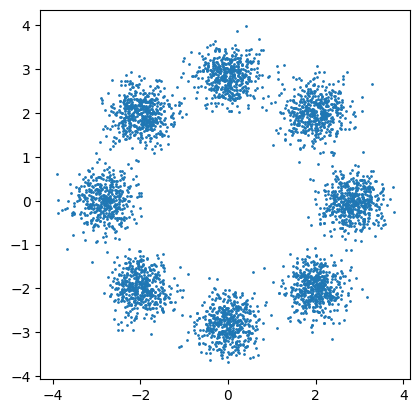

In [82]:
data_sample = gen_data(2 ** 12)

viz_2d_data(data_sample)

In [83]:
def train(model, time_sampler, gen_data_f):
    iter = 10 ** 5
    bs = 2 ** 10

    #set lr higher for model.gamma than for the rest using param group

    optim = torch.optim.Adam([*model.parameters(), *time_sampler.parameters()], lr=1e-3)

    pbar = trange(iter)
    for i in pbar:
        x = gen_data_f(bs)

        t, p = time_sampler(bs=bs)
        t, p = t.detach(), p.detach()

        loss = model(x, t)
        loss = loss / p + time_sampler.loss(loss.detach(), t)

        # plt.scatter(t[:, 0], loss.detach().numpy(), s=1)
        # plt.scatter(t[:, 0], p.detach().numpy(), s=1)
        # plt.show()

        loss = loss.mean()

        if (i + 1) % 100 == 0:
            pbar.set_description(f"{loss.item():.4f}")

        optim.zero_grad()
        loss.backward()
        optim.step()

In [90]:
old_mulan_config = SimpleNamespace(
                gamma_shape=(2,),
                seq_len= 1,
                embedding_dim= 2,#2
                gamma_min= -10, #-13.3
                gamma_max= 10, # 5
                learn_tau=False,
                learn_delta=False,
                around_reference=False,
            )

mulan_config = SimpleNamespace(
                gamma_shape=(2,),
                seq_len= 1,
                embedding_dim= 2,#2
                #gamma_min= -10, #-13.3
                #gamma_max= 10, # 5
                learn_tau=False,
                learn_delta=False,
                gamma_min= -4.6002,
                gamma_max= 14.5561,
                around_reference=True,
            )
                
transform = AffineTransformID()
#transform = AffineTransformHalfNeural(d=2)

gamma = GammaLinear()
#gamma = GammaVDM()
#gamma = GammaBad()
#gamma = GammaMuLAN(mulan_config)
#gamma = GammaMuLANtDir(mulan_config)
#gamma = GammaARReversed(mulan_config)
#print(gamma)

vol_eta = VolatilityEtaOne()
#vol_eta = VolatilityEtaNeural()

pred = Predictor(d=2)

ndm = NeuralDiffusion(transform, gamma, vol_eta, pred)

time_sampler = UniformBucketSampler()
#time_sampler = UniformSampler()

train(model=ndm, time_sampler=time_sampler, gen_data_f=gen_data)
print("hallo")

237.8419:  20%|█▉        | 19522/100000 [01:31<06:18, 212.43it/s]


KeyboardInterrupt: 

In [ ]:
#check the loss at t=1
bs = 2 ** 10
x = gen_data(2 ** 10)
t = torch.ones(bs, 1)
print(t)
#t = t.detach()
loss = ndm(x, t)

print(loss)
print(loss.mean())


In [ ]:
#check the loss at t=1
bs = 2 ** 10
x = gen_data(2 ** 10)
t = torch.zeros(bs, 1) + 0.5
t = t.detach()
loss = ndm(x, t)


print(loss.mean())


/tmp/ipykernel_12872/3677815263.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(p_values, t_values)  # Numerical integration


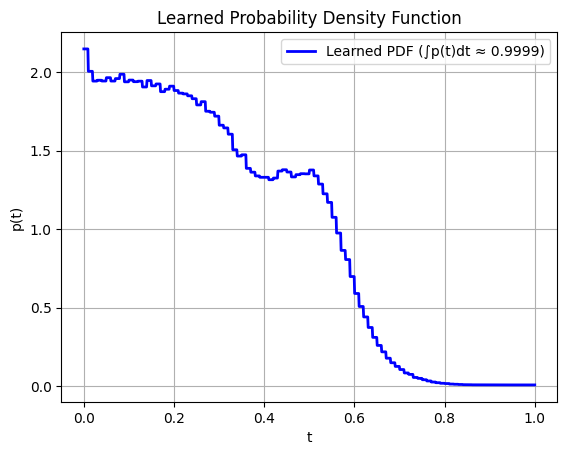

Estimated integral of p(t) over [0,1]: 0.9999
✅ PDF is properly normalized.


In [91]:
def plot_pdf(sampler: BucketSampler, num_points=1000):
    with torch.no_grad():
        # Generate evenly spaced t values
        t_values = torch.linspace(0, 1, num_points).view(-1, 1)  # Shape: (num_points, 1)
        
        # Compute p(t) at these points
        p_values = sampler.prob(t_values).cpu().numpy().flatten()
        t_values = t_values.cpu().numpy().flatten()

        # Compute the integral using the trapezoidal rule
        dt = 1 / (num_points - 1)  # Step size
        integral = np.trapz(p_values, t_values)  # Numerical integration

        # Plot the learned PDF
        plt.plot(t_values, p_values, label=f"Learned PDF (∫p(t)dt ≈ {integral:.4f})", color="b", linewidth=2)
        plt.xlabel("t")
        plt.ylabel("p(t)")
        plt.title("Learned Probability Density Function")
        plt.legend()
        plt.grid(True)
        plt.show()

        # Print the integral value
        print(f"Estimated integral of p(t) over [0,1]: {integral:.4f}")
        if abs(integral - 1) > 0.05:
            print("⚠️ Warning: PDF is not properly normalized!")
        else:
            print("✅ PDF is properly normalized.")

plot_pdf(time_sampler)

#isnt this the wrong way arround? loss should be higher for high t not low t, and gamma isnt focussed on any particular part yet 

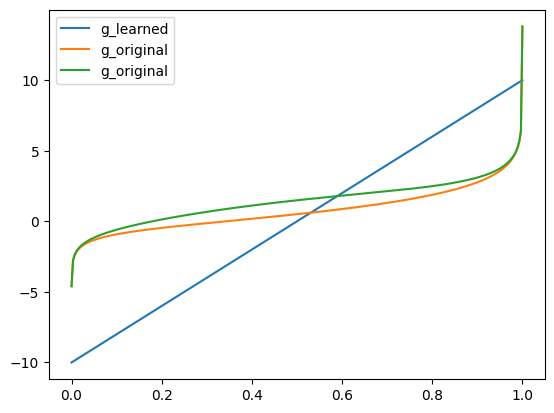

tensor([[5.0990e+03, 5.1025e+03],
        [1.5254e+02, 1.5599e+02],
        [7.8574e+01, 8.2012e+01],
        [5.3187e+01, 5.6611e+01],
        [4.0307e+01, 4.3717e+01],
        [3.2504e+01, 3.5901e+01],
        [2.7264e+01, 3.0648e+01],
        [2.3501e+01, 2.6870e+01],
        [2.0666e+01, 2.4022e+01],
        [1.8454e+01, 2.1795e+01],
        [1.6679e+01, 2.0005e+01],
        [1.5224e+01, 1.8535e+01],
        [1.4009e+01, 1.7306e+01],
        [1.2980e+01, 1.6262e+01],
        [1.2097e+01, 1.5364e+01],
        [1.1332e+01, 1.4584e+01],
        [1.0663e+01, 1.3899e+01],
        [1.0073e+01, 1.3293e+01],
        [9.5487e+00, 1.2754e+01],
        [9.0803e+00, 1.2269e+01],
        [8.6594e+00, 1.1832e+01],
        [8.2793e+00, 1.1436e+01],
        [7.9346e+00, 1.1075e+01],
        [7.6205e+00, 1.0744e+01],
        [7.3335e+00, 1.0441e+01],
        [7.0703e+00, 1.0160e+01],
        [6.8281e+00, 9.9012e+00],
        [6.6047e+00, 9.6607e+00],
        [6.3981e+00, 9.4368e+00],
        [6.206

In [86]:
with torch.no_grad():
    t = torch.linspace(0, 1, 300)[:, None]

    gamma_og = GammaMuLAN(mulan_config)

    g_og, d_gamma = gamma_og(t)

    g, _ = gamma(t)


    plt.plot(t, g, label='g_learned')
    plt.plot(t, g_og, label='g_original')
    plt.legend()
    plt.show()

    print(d_gamma)



[0.014157131314277649, 0.013938989490270615, 0.013605541549623013, 0.013286812230944633, 0.013071490451693535, 0.012745159678161144, 0.012492495588958263, 0.012193282134830952, 0.011956199072301388, 0.011698250658810139, 0.01145409606397152, 0.011199390515685081, 0.010935578495264053, 0.01070872787386179, 0.01047755591571331, 0.01031382568180561, 0.010073222219944, 0.009892570786178112, 0.009631398133933544, 0.009382900781929493, 0.009254173375666142, 0.00904790498316288, 0.008866684511303902, 0.008701719343662262, 0.008545112796127796, 0.00829604733735323, 0.008120923303067684, 0.007973089814186096, 0.007822471670806408, 0.007637265138328075, 0.007503197528421879, 0.007323296740651131, 0.007184375077486038, 0.007038078736513853, 0.006911591626703739, 0.006756804883480072, 0.006642772816121578, 0.0064901127479970455, 0.006324527785181999, 0.006207979284226894, 0.006085740402340889, 0.005946654360741377, 0.005831771530210972, 0.005717618390917778, 0.0056087481789290905, 0.00547640677541

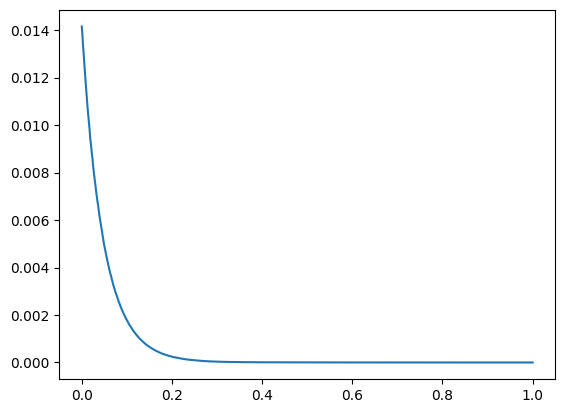

In [87]:
#also print the loss for these same values of 10
#x = gen_data(1).repeat(1000, 1)
x = gen_data(1000)
t_points = torch.linspace(0, 1, 1000)[:, None]

losses = []
for t in t_points:
    t = t.expand(x.shape[0], 1)
    #print(t.shape)
    #print(x.shape)
    #print(t)
    loss = ndm(x, t)
    avg_loss = loss.mean()
    losses.append(avg_loss.item())


print(losses)
loss = torch.tensor(losses)
plt.plot(t_points, loss.detach().numpy())
plt.show() 

#same 

### Train MuLAN

# See what happens when lambda "collapses"

In [ ]:
"""
transform = AffineTransformID()
#transform = AffineTransformHalfNeural(d=2)

# gamma = GammaLinear()
#gamma = GammaVDM()
gamma = GammaBad()

vol_eta = VolatilityEtaOne()
#maybe eta one is not optimal?
# vol_eta = VolatilityEtaNeural()

pred = Predictor(d=2)

ndm = NeuralDiffusion(transform, gamma, vol_eta, pred)

time_sampler = UniformBucketSampler()
#time_sampler = UniformSampler()

train(model=ndm, time_sampler=time_sampler, gen_data_f=gen_data)
"""

\begin{align}
f^B = \dot{\alpha} F + \alpha \dot{F} + \frac{\dot{\sigma}}{\sigma} (z - \alpha F) - \frac{g^2}{2} \frac{\alpha F - z}{\sigma^2} \\
\end{align}

## Visualisation

### SDE Sampling

tensor([[-0.1071,  2.6603],
        [ 2.1489, -2.2892],
        [ 2.0590, -1.9407],
        ...,
        [ 0.6945, -2.8210],
        [-1.6508,  1.7119],
        [ 1.2373,  1.7816]])


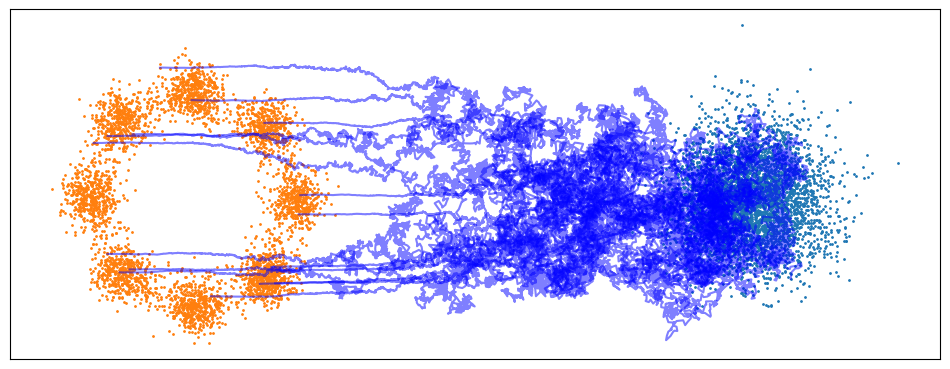

In [92]:
bs = 2 ** 12

z = torch.randn(bs, 2)


def sde(z_in, t_in):
    gmm, d_gmm = gamma(t_in)
    alpha_2 = gamma.alpha_2(gmm)
    sigma_2 = gamma.sigma_2(gmm)
    alpha = alpha_2 ** 0.5
    sigma = sigma_2 ** 0.5 #I added this 

    #print(gmm, "gmm")
    #print(d_gmm, "d_gmm")
    #print(alpha_2, "alpha_2")
    #print(sigma_2, "sigma_2")
    #print(alpha, "alpha")
    #print(sigma, "sigma")

    eta = vol_eta(t_in)

    g = (sigma_2 * d_gmm * eta) ** 0.5

    x_ = pred(z_in, t_in)

    (m_, _), (d_m_, _) = transform(x_, t_in)

    #print(d_m_, "d_m")
    #print(sigma_2, "sigma2")
    #print(eta, "eta")
    #print(d_gmm, "d_gmm")
    #print(g, "g")

    #drift = -alpha * d_gmm * (1 + eta) / 2 * m_ + \
    #        alpha * d_m_ + \
    #        0.5 * d_gmm * (alpha_2 + eta) * z_in
    eps = (z_in - alpha * m_) / sigma
    alpha_prime = - d_gmm * 0.5 * alpha * (1- alpha_2) 
    sigma_prime = 0.5 * d_gmm * sigma * (1 - sigma_2)
    #dz = -alpha * d_gmm + alpha * d_m_ + sigma * d_gmm * eps
    dz = alpha_prime * m_ + alpha * d_m_ + sigma_prime * eps
    drift = dz - 0.5 * (g ** 2) * ((alpha * m_ - z_in) / sigma_2)

    #print(eps, "eps")
    #print(alpha_prime, "alpha_prime")
    #print(sigma_prime, "sigma_prime")
    #print(dz, "dz")
    #print(drift, "drift")

    return drift, g


_, (t_steps, path) = solve_sde(sde=sde, z=z, ts=1, tf=0, n_steps=3000)

print(path[-1])
viz_2d_path(t_steps, path, n_lines=16, color="blue")

### Star Diffusion

In [150]:
def denoised_fn(x, t):
    pass

In [ ]:
def predicting_part(prev_sample, t, denoised_fn):
    def process_xstart(x):
        if denoised_fn is not None:
            # print(denoised_fn)
            x = denoised_fn(x, t)
        if False:# clip_denoised:
            return x.clamp(-1, 1)
        return x
    
    out = {}
    x_ = pred(prev_sample, t) 
    
    x_start = process_xstart(x_)
    out["pred_xstart"] = x_start

    gmm, _ = gamma(t)
    alpha = gamma.alpha_2(gmm) ** 0.5
    sigma2 =  gamma.sigma_2(gmm)

    m, _ = transform.get_m_s(x_start, t)

    out["mean"] = alpha*m
    out["log_variance"] = torch.log(sigma2)


    noise = torch.randn_like(prev_sample)
    nonzero_mask = (
        (t != 0).float().view(-1, *([1] * (len(prev_sample.shape) - 1)))
    )  # no noise when t == 0
    sample = out["mean"] + nonzero_mask * torch.exp(0.5 * out["log_variance"]) * noise 
    return sample

@torch.no_grad()
def discrete_sampling_star(
        z: Tensor,
        ts: float,
        tf: float,
        n_steps: int,
        show_pbar: bool=True
):
    bs = z.shape[0]

    t_steps = torch.linspace(ts, tf, n_steps + 1)#[:-1]
    dt = (tf - ts) / n_steps
    dt_2 = abs(dt) ** 0.5

    path = [z]
    pbar = tqdm if show_pbar else (lambda a: a)
    for t in pbar(t_steps):
        t = t.expand(bs, 1)

        z = predicting_part(prev_sample=z, t=t, denoised_fn=None)

        path.append(z)

    return z, (t_steps, torch.stack(path[:-1]))


bs = 2 ** 12

z = torch.randn(bs, 2)

_, (t_steps, path) = discrete_sampling_star(z=z, ts=1, tf=0, n_steps=300)

print(path[-1])
viz_2d_path(t_steps, path, n_lines=16, color="blue")

### Correct Marginal Sampling

\begin{align}
    z_t = F(\varepsilon, t, x)
\end{align}

Then given z_t and t (n(0,1) noise and t=1), do:

1. x_0 prediction, $$x\_ = model.pred(z_t, t)$$
2. get epsilon by inverse big F, $$\varepsilon = \frac{(z - \alpha F) }{\sigma}$$
3. get epsilon s|t, 

\begin{align}
    \tilde{\varepsilon}_{s|t} = \sqrt{1- \tilde{\sigma}^2_{s|t}} \varepsilon + \tilde{\sigma}_{s|t} \tilde{\varepsilon}
\end{align}

where,

\begin{align}
    \tilde{\sigma}_{s|t} = \sigma_s^2 - \frac{SNR(t)}{SNR(s)}\sigma_s^2
\end{align}

and,

\begin{align}
 \tilde{\varepsilon} - N(0,1)? 
\end{align}
because otherwise no new noise would be injected


4. get z_s (next z) by feeding through the forward process. 
\begin{align}
    z = F(\tilde{\varepsilon}_{s|t}, s, x)
\end{align}

\begin{align}
    z = \alpha_s F + \sigma_s (\sqrt{1- \tilde{\sigma}^2_{s|t}} \varepsilon + \tilde{\sigma}_{s|t} \tilde{\varepsilon})
\end{align}

but that doesnt match the ndm appendix 1 I think? and it doesnt lead to a marginalized standard deviation of sigma_s, which would instead need,

\begin{align}
    z = \alpha_s F + (\sqrt{\sigma_s^2 - \tilde{\sigma}^2_{s|t}} \varepsilon + \tilde{\sigma}_{s|t} \tilde{\varepsilon})
\end{align}

which I suppose you could also write as 
\begin{align}
    \tilde{\varepsilon}_{s|t} = \frac{1}{\sigma^2_s}(\sqrt{\sigma^2_s- \tilde{\sigma}^2_{s|t}} \varepsilon + \tilde{\sigma}_{s|t} \tilde{\varepsilon})
\end{align}



In [ ]:
def get_next_marginal(prev_sample, t, s, denoised_fn):
    def process_xstart(x):
        if denoised_fn is not None:
            # print(denoised_fn)
            x = denoised_fn(x, t)
        if False:# clip_denoised:
            return x.clamp(-1, 1)
        return x
    
    #step 1 do prediction 
    x_ = pred(prev_sample, t) 
    
    x_start = process_xstart(x_)

    #step 2 get epsilon
    gmm, _ = gamma(t)
    alpha2 = gamma.alpha_2(gmm)
    sigma2 =  gamma.sigma_2(gmm)
    alpha = alpha2 ** 0.5
    sigma = sigma2 ** 0.5

    m_ , _ = transform.get_m_s(x_start, t)

    eps = (prev_sample - alpha * m_) / sigma

    #step 3 get epsilon s|t
    #we need stepsize for this?
    noise = torch.randn_like(prev_sample)
    gmm_s, _ = gamma(s)
    alpha2_s = gamma.alpha_2(gmm_s)
    sigma2_s =  gamma.sigma_2(gmm_s)
    alpha_s = alpha2_s ** 0.5
    sigma_s = sigma2_s ** 0.5
    
    m_s , _ = transform.get_m_s(x_start, s)

    #print(gmm_s)
    snr_t = (alpha2/sigma2).double()
    snr_s = (alpha2_s/sigma2_s).double()

    #sigma2_tilde_s_t = (1 -  (snr_t / snr_s)).float() #instead of casting back to float here we can alos cast back only after computing epsilon tilde st
    sigma2_tilde_s_t = -torch.expm1(gmm_s - gmm) #should be in 0-1
    #print(sigma2_tilde_s_t, "sigma2_tilde_s_t")

    #or option 3

    epsilon_tilde_s_t = torch.sqrt(1 - sigma2_tilde_s_t) * eps + (sigma2_tilde_s_t.sqrt()) * noise 

    #print("snr_t", snr_t[0])
    #print("snr_s", snr_s[0])
    #print("sigma", sigma2_tilde_s_t) #this should be positive always but isnt so im doing something wrong. 

    #step 4 get z_s
    sample = alpha_s * m_s + sigma_s * epsilon_tilde_s_t
    
    #if we want to match appendix 1 of ndm paper I think it should instead be
    #sample = alpha_s * m_s +  torch.sqrt(sigma2 - sigma2_tilde_s_t) * eps + (sigma2_tilde_s_t ** 0.5) * noise

    return sample

@torch.no_grad()
def discrete_sampling(
        z: Tensor,
        ts: float,
        tf: float,
        n_steps: int,
        show_pbar: bool=True
):
    bs = z.shape[0]

    t_steps = torch.linspace(ts, tf, n_steps + 1)#[:-1]
    dt = (tf - ts) / n_steps
    dt_2 = abs(dt) ** 0.5

    path = [z]
    pbar = tqdm if show_pbar else (lambda a: a)
    for t in pbar(t_steps[:-1]):
        t = t.expand(bs, 1)

        #I understand I am doing 2x-1 the number of needed forward pass through gamma now, Ill fix that before putting it into the actual code.        
        z = get_next_marginal(prev_sample=z, t=t, s=t+dt, denoised_fn=None)

        path.append(z)

    return z, (t_steps, torch.stack(path))


bs = 2 ** 12

z = torch.randn(bs, 2)

_, (t_steps, path) = discrete_sampling(z=z, ts=1, tf=0, n_steps=300)

print(path[-1])
viz_2d_path(t_steps, path, n_lines=16, color="blue")

### ODE sampling

that means we need just f(z,t,eps)|eps=F(z,t,)înverser. We have, \\
\begin{align}
    z = F(\varepsilon, t, x),
\end{align}
and specifically in the ndm/vdm case, \\
\begin{align}
    z = \alpha F(x, t) + \sigma \varepsilon
\end{align}
The ODE drift is given by \\
\begin{align}
    dz = f_{tilde}(z_t, t, x\_)dt
\end{align}
Where 
\begin{align}
    f_{tilde}(z_t, t, x\_) &= d/dt F(eps, t, x) \\
    &= alpha' * m + alpha * dm + sigma' * eps
\end{align}

\begin{align}
f &= \dot{\alpha} F + \alpha \dot{F} + \frac{\dot{\sigma}}{\sigma} (z - \alpha F) 
\end{align}


In [ ]:
bs = 2 ** 12

z = torch.randn(bs, 2)


def ode(z_in, t_in):
    gmm, d_gmm = gamma(t_in)
    alpha_2 = gamma.alpha_2(gmm)
    sigma_2 = gamma.sigma_2(gmm)
    alpha = alpha_2 ** 0.5
    sigma = sigma_2 ** 0.5

    #eta = vol_eta(t_in)

    x_ = pred(z_in, t_in)

    (m_, _), (d_m_, _) = transform(x_, t_in)

    eps = (z_in - alpha * m_) / sigma
    alpha_prime = - d_gmm * 0.5 * alpha * (1- alpha_2) 
    sigma_prime = 0.5 * d_gmm * sigma * (1 - sigma_2)
    #dz = -alpha * d_gmm + alpha * d_m_ + sigma * d_gmm * eps
    dz = alpha_prime * m_ + alpha * d_m_ + sigma_prime * eps
    #dz = -alpha_prime + alpha * d_m_ + sigma_prime * eps

    
    return dz, 0


_, (t_steps, path) = solve_sde(sde=ode, z=z, ts=1, tf=0, n_steps=300)

viz_2d_path(t_steps, path, n_lines=16, color="blue")

### Adaptive step size ODE sampling

In [ ]:
import torch
from torchdiffeq import odeint

def ode_adaptor(t, z):
    #print(t)
    t = t.expand(z.shape[0], 1)
    #print(z.shape)
    #print(t.shape) # bs x 2, why is this bs by 2??, needs to be bs x 1 where t moves from 1 to 0 over time
    drift, _ = ode(z, t)
    return drift

@torch.no_grad()
def integrate_ode_torch(z0, t_span=(1.0, 0.0), atol=1e-6, rtol=1e-7):
    # Here, we only provide the initial conditions (z0) and the time span (t_span)
    # The solver will automatically select adaptive time steps within the provided range
    t = torch.linspace(1.0, 0.0, 10000)  # Reverse time to go from 1 to 0
    # Solve the ODE using RK45 (dopri5 with adaptive step size)
    path = odeint(ode_adaptor, z0, t = t, method='dopri5', atol=atol, rtol=rtol)

     # The solver automatically handles the time steps
    final_state = path[-1]  # Last step of integration

    return final_state, (t, path)

bs = 2 ** 12
print(bs)

z = torch.randn(bs, 2)

final, (t_steps, path) = integrate_ode_torch(z)

print("steps taken", len(path))
print("steps", t_steps)

viz_2d_data(final.detach().numpy())
viz_2d_path(t_steps.detach().numpy(), path.detach().numpy(), n_lines=16, color="blue")

In [ ]:
with torch.no_grad():
    t = torch.linspace(0, 1, 300)[:, None]

    g, _ = gamma(t)
    alpha2 = gamma.alpha_2(g)
    sigma2 = gamma.sigma_2(g)
    snr = alpha2 / sigma2

    plt.plot(t, snr)
    plt.show()

#clearly t > s implies snr(t) < snr(s)

In [ ]:
with torch.no_grad():
    t = torch.linspace(0, 1, 300)[:, None]

    g, _ = gamma(t)

    plt.plot(g)
    plt.show()

### plotting $\lambda_x$ and snr' for their method

from the vdm paper we know, 
\begin{align}
\mathcal{L}_{\infty} (\mathbf{x}) = -\frac{1}{2} \mathbb{E}_{\boldsymbol{\epsilon} \sim \mathcal{N}(\mathbf{0}, \mathbf{I})} \int_0^1 \text{SNR}'(t) \left\| \mathbf{x} - \hat{\mathbf{x}}_{\boldsymbol{\theta}} (\mathbf{z}_t; t) \right\|_2^2 dt,
\end{align}

so if, 
\begin{align}
    \mathcal{L} = \lambda_x \left\| x - \hat{x} \right\|_2^2
\end{align} 
then 
\begin{align}
  \lambda_x = -0.5 * \text{SNR}'(t)
\end{align} 

In [238]:
from torch import nn
import torch
class Sqrt(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x, t):
        # Scale t to simulate a different schedule
        s = (0.99-t) * 0.0001
        output3 = torch.sqrt(1- torch.sqrt(t+s))

        output0 = output3 * x
        output1 = torch.sqrt(torch.sqrt(t + s))
        print("1is it using this code=------------------------------------------------------------")

        #a seperate output for the diffusion loss scaling term
        return output0, output1, output3

def jvp(f, x, v):
    #print(x.dtype)
    #print(v.dtype)
    with torch.inference_mode(False):
        x = x.clone()
        v = v.clone()
        #print(x.requires_grad, "x requires grad")
        #print(v.requires_grad, "v requires grad")
        return torch.autograd.functional.jvp(
            f, x, v,
            create_graph=torch.is_grad_enabled()
        )

def t_dir(f, t):
    return jvp(f, t, torch.ones_like(t))


In [ ]:
x = torch.rand((64,64,128))
affine = Sqrt()

def f(t_in):
    return affine(x, t_in)

t = torch.linspace(0.1, 1, 300)[:, None] #NOTE: snr prime is very large at t=0 so I removed it for visualization
t = t.unsqueeze(-1).unsqueeze(-1)

(m, s, alpha), (dm, ds, dalpha) = t_dir(f, t)

#snr_prime = (-1/2) * ((0.9999*t + 0.000099) ** (-3/2)) * 0.9999
#print(snr_prime)
snr_prime = 2 * alpha * (dalpha * s -alpha * ds) / (s ** 3)
snr_prime = snr_prime.squeeze()
print(snr_prime)
lmdb_x = -0.5 * snr_prime
t = t.squeeze()
#print(snr_prime)
snr_prime = snr_prime.detach().numpy()
lmdb_x = lmdb_x.detach().numpy()
t = t.detach().numpy()

plt.plot(t, snr_prime, label='snr_prime')
plt.plot(t, lmdb_x, label='lmdb_x')
plt.legend()
plt.show()

In [ ]:
class GammaTheirs(Gamma):
    def __init__(self):
        super().__init__()

    def get_gamma(self, t):
        def safe_logit(x, eps=1e-6):
            """
            Stable log( x / (1 - x) ) for x in (0, 1).

            Parameters
            ----------
            x   : torch.Tensor   -- input, any shape
            eps : float          -- clamp width; keeps gradients finite
            """
            x = x.clamp(eps, 1.0 - eps)            # avoid exactly 0 or 1
            return torch.log(x) - torch.log1p(-x)   # log(x) - log(1 - x)
        s = (0.99-t) * 0.0001
        sqrt = torch.sqrt(t+s)
        gamma = safe_logit(sqrt)

        return gamma

gamma = GammaTheirs()

with torch.no_grad():
    t = torch.linspace(0, 1, 300)[:, None]

    g, dg = gamma(t)
    one_over_dg = 1 / (dg)

    plt.plot(t, dg)
    plt.plot(t, g)
    plt.show()

NameError: name 'Gamma' is not defined

In [ ]:
with torch.no_grad():
    t = torch.linspace(0, 1, 300)[:, None]
    gmm, dgamma = gamma(t)
    alpha_2 = gamma.alpha_2(gmm)
    sigma_2 = gamma.sigma_2(gmm)
    alpha = alpha_2 ** 0.5
    sigma = sigma_2 ** 0.5

    #also get alpha and sigma from the sqrt function and plot them in the same graph as the other alpha and sigma, so make three plots
    sqrt = Sqrt()
    alpha_sqrt, sigma_sqrt, _ = sqrt(torch.tensor(1.), t)

    plt.plot(alpha)
    plt.plot(alpha_sqrt)
    plt.legend(["alpha", "alpha_sqrt"])
    plt.show()
    plt.close()

    plt.plot(sigma) #flag2
    plt.plot(sigma_sqrt)
    plt.legend(["sigma", "sigma_sqrt"])
    plt.show()
    plt.close()

    plt.plot(gmm)
    plt.legend(["gamma"])
    plt.show()
    plt.close()

    plt.plot(dgamma)
    print(dgamma)
    plt.legend(["dgamma"])
    plt.show()
    plt.close()
